# SPamCo with Ensembles

In [1]:
#Math packages
import numpy as np

#Data packages
import pandas as pd
import pandas_profiling

#Spamco
from spamco import SPamCo, Validation

#Data packages
from sklearn.datasets import make_moons, make_classification, make_circles, make_blobs, make_gaussian_quantiles
from sklearn.datasets import load_breast_cancer, load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

#Classifier packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

#Validation packages
from sklearn.metrics import accuracy_score

#Visualization packages
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import baycomp

#General utility packages
from itertools import cycle, islice
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams.update({'font.size': 20})

In [2]:
def load_diabetes():
    df = pd.read_csv('Data/diabetes.csv')
    y =df.values[:,0]
    X =df.drop(['Diabetes_012','AnyHealthcare'], axis = 1).values
    return X, y

In [3]:
def load_blood():
    X, y = fetch_openml(data_id = 1464, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [4]:
def load_qsar():
    X, y = fetch_openml(data_id = 1494, return_X_y=True)
    X = X.drop(['V1'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [5]:
def load_eegeye():
    X, y = fetch_openml(data_id = 1471, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [6]:
def load_ilpd():
    X, y = fetch_openml(data_id = 1480, return_X_y=True)
    LE = LabelEncoder()
    X['V2'] = LE.fit_transform(X['V2'])
    X = X.values
    y = LE.fit_transform(y)
    return X, y

In [7]:
def load_click():
    X, y = fetch_openml(data_id = 1220, return_X_y=True)
    X = X.drop(['user_id'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [8]:
def load_satimage():
    X, y = fetch_openml(data_id = 182, return_X_y=True)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [9]:
def load_robot():
    X, y = fetch_openml(data_id = 300, return_X_y=True)
    X = X.drop(['f451'], axis=1)
    X = X.values
    LE = LabelEncoder()
    y = LE.fit_transform(y)
    return X, y

In [10]:
np.random.seed(1)
seed = np.random.randint(low = 1, high = 10000, size = 10)

In [11]:
seed

array([ 236, 5193,  906, 7814, 2896, 5057,  145, 4226, 7752, 3463])

# Toy Datasets

In [12]:
datasets = {
    'breast_cancer': load_breast_cancer(return_X_y=True),
    'digits': load_digits(return_X_y=True),
    'blood': load_blood(),
    'diabetes': load_diabetes(),
    'qsar': load_qsar(),
    'eegeye': load_eegeye(),
    'ilpd': load_ilpd(),
    'click': load_click(),
    'satimage': load_satimage(),
    'isolet': load_robot()
}

## AdaBoost

In [13]:
adaboost_base_metrics = []
adaboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        iters=10
    )

    adaboost_base_metrics.append(metrics)
    adaboost_base_clfs.append(clfs)

    adaboost_base_score = np.array(adaboost_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9064327485380117 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.26296296296296295 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.72 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8471433827394093 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.7034700315457413 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.6902536715620827 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6685714285714286 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.8287025448477263 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.432348367029549 Labels: 225
Dataset: isolet
Validation Iteration: 0 Accuracy: 0.12393162393162394 Labels: 272


In [14]:
adaboost_base_score

array([[0.90643275, 0.87134503, 0.88888889, 0.91812865, 0.86549708,
        0.87134503, 0.89473684, 0.91812865, 0.9005848 , 0.85964912],
       [0.26296296, 0.17962963, 0.17592593, 0.15      , 0.27407407,
        0.24074074, 0.25740741, 0.18888889, 0.22222222, 0.22407407],
       [0.72      , 0.68      , 0.71555556, 0.71555556, 0.67111111,
        0.67111111, 0.65333333, 0.77333333, 0.72      , 0.72444444],
       [0.84714338, 0.84826028, 0.84726164, 0.8451724 , 0.84413434,
        0.84408178, 0.84701198, 0.84397666, 0.84538263, 0.84626301],
       [0.70347003, 0.74763407, 0.76340694, 0.8170347 , 0.66876972,
        0.75709779, 0.7444795 , 0.69400631, 0.75394322, 0.72239748],
       [0.69025367, 0.71005785, 0.70226969, 0.68958611, 0.7165109 ,
        0.69826435, 0.70315977, 0.71339564, 0.72207388, 0.70226969],
       [0.66857143, 0.67428571, 0.66857143, 0.69714286, 0.63428571,
        0.64571429, 0.64571429, 0.69714286, 0.73142857, 0.52      ],
       [0.82870254, 0.82453066, 0.8275344

In [15]:
adaboost_multi_metrics = []
adaboost_multi_clfs = []

for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    steps = 20
    views = 2

    model =  {
        'classifier':AdaBoostClassifier(),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'soft',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    adaboost_multi_metrics.append(metrics)
    adaboost_multi_clfs.append(clfs)
    
adaboost_multi_score = np.array(adaboost_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.8888888888888888 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.1814814814814815 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8424130137706297 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.6340694006309149 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.5511793502447708 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.7142857142857143 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.1831455986649979 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.5660964230171073 Labels: 225
Dataset: isolet
Validation Iteration: 0 Accuracy: 0.06111111111111111 Labels: 272


In [16]:
adaboost_multi_score

array([[0.88888889, 0.37426901, 0.37426901, 0.88888889, 0.83625731,
        0.37426901, 0.88888889, 0.91812865, 0.37426901, 0.37426901],
       [0.18148148, 0.1037037 , 0.12222222, 0.12037037, 0.18518519,
        0.22592593, 0.13888889, 0.09444444, 0.1037037 , 0.13703704],
       [0.76      , 0.74666667, 0.78222222, 0.76      , 0.76      ,
        0.55111111, 0.71111111, 0.76      , 0.76      , 0.76      ],
       [0.84241301, 0.84241301, 0.84241301, 0.84241301, 0.84241301,
        0.84241301, 0.84241301, 0.84241301, 0.84241301, 0.84241301],
       [0.6340694 , 0.66246057, 0.71293375, 0.70031546, 0.47318612,
        0.70662461, 0.70031546, 0.68138801, 0.70347003, 0.63722397],
       [0.55117935, 0.55117935, 0.56964842, 0.54383623, 0.582332  ,
        0.54917668, 0.55696484, 0.55117935, 0.54784157, 0.55518469],
       [0.71428571, 0.37142857, 0.71428571, 0.70857143, 0.44      ,
        0.63428571, 0.71428571, 0.67428571, 0.43428571, 0.6       ],
       [0.1831456 , 0.82987067, 0.8315394

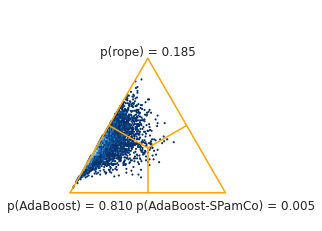

In [17]:
baycomp_ada, bayplot_ada = baycomp.two_on_multiple(
    adaboost_base_score, 
    adaboost_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('AdaBoost','AdaBoost-SPamCo'))

In [18]:
bayplot_ada.savefig('AdaBoost_Simplex_BayesianComp_Soft.png')

## RandomForrestClassifier

In [19]:
rfc_base_metrics = []
rfc_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'hard'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        iters=10
    )

    rfc_base_metrics.append(metrics)
    rfc_base_clfs.append(clfs)

    rfc_base_score = np.array(rfc_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9532163742690059 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.812962962962963 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7555555555555555 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.844344581099548 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.7381703470031545 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.778816199376947 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6914285714285714 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.8226115978306217 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.847071021254536 Labels: 225
Dataset: isolet
Validation Iteration: 0 Accuracy: 0.8538461538461538 Labels: 272


In [20]:
rfc_multi_metrics = []
rfc_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')
    
    steps = 20
    views = 2
    
    model =  {
        'classifier':RandomForestClassifier(),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'soft',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    rfc_multi_metrics.append(metrics)
    rfc_multi_clfs.append(clfs)
    
rfc_multi_score = np.array(rfc_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9239766081871345 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.7555555555555555 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8339771891096395 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.694006309148265 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.6526479750778816 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6914285714285714 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.7611180642469754 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.7776049766718507 Labels: 225
Dataset: isolet
Validation Iteration: 0 Accuracy: 0.8269230769230769 Labels: 272


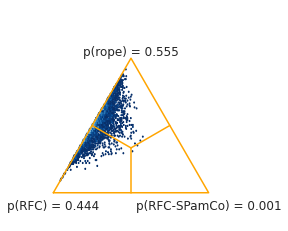

In [21]:
baycomp_rfc, bayplot_rfc = baycomp.two_on_multiple(
    rfc_base_score, 
    rfc_multi_score, 
    plot=True, 
    rope=0.05, 
    names = ('RFC','RFC-SPamCo'))

In [22]:
bayplot_rfc.savefig('RandomForestClassifier_Simplex_BayesianComp_Soft.png')

## XGBoost

In [23]:
xgboost_base_metrics = []
xgboost_base_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')

    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':1,
        'gamma':0.3,
        'steps':10,
        'regularizer':'soft'
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.1,
        random_seed=np.arange(0,10),
        iters=10
    )

    xgboost_base_metrics.append(metrics)
    xgboost_base_clfs.append(clfs)

    xgboost_base_score = np.array(xgboost_base_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9064327485380117 Labels: 39
Dataset: digits
Validation Iteration: 0 Accuracy: 0.8333333333333334 Labels: 125
Dataset: blood
Validation Iteration: 0 Accuracy: 0.7422222222222222 Labels: 52
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8395353726479554 Labels: 17757
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.7634069400630915 Labels: 73
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.821762349799733 Labels: 1048
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6742857142857143 Labels: 40
Dataset: click
Validation Iteration: 0 Accuracy: 0.812348769294952 Labels: 2796
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.8465526179367548 Labels: 450
Dataset: isolet
Validation Iteration: 0 Accuracy: 0.8222222222222222 Labels: 545


In [24]:
xgboost_multi_metrics = []
xgboost_multi_clfs = []
for key in datasets: 
    X, y = datasets[key]
    print(f'Dataset: {key}')
    
    steps = 20
    views = 2
    
    model =  {
        'classifier':xgb.XGBClassifier(silent=True, verbosity=0),
        'num_view':views,
        'gamma':0.3,
        'steps':10,
        'regularizer':'soft',
        'update_add_num': int(X.shape[0]/steps)
    }

    clfs, metrics = Validation.validation(
        model_params=model,
        train_data_x=X,
        train_data_y=y,
        percent_labeled=0.05,
        random_seed=seed,
        spaco=True,
        iters=10,
        hsplit=True,
        hsplit_size=2
    )
    
    xgboost_multi_metrics.append(metrics)
    xgboost_multi_clfs.append(clfs)
    
xgboost_multi_score = np.array(xgboost_multi_metrics)

Dataset: breast_cancer
Validation Iteration: 0 Accuracy: 0.9122807017543859 Labels: 19
Dataset: digits
Validation Iteration: 0 Accuracy: 0.6925925925925925 Labels: 62
Dataset: blood
Validation Iteration: 0 Accuracy: 0.76 Labels: 26
Dataset: diabetes
Validation Iteration: 0 Accuracy: 0.8423867339430253 Labels: 8878
Dataset: qsar
Validation Iteration: 0 Accuracy: 0.6498422712933754 Labels: 36
Dataset: eegeye
Validation Iteration: 0 Accuracy: 0.6119270137961726 Labels: 524
Dataset: ilpd
Validation Iteration: 0 Accuracy: 0.6285714285714286 Labels: 20
Dataset: click
Validation Iteration: 0 Accuracy: 0.4987901543596162 Labels: 1398
Dataset: satimage
Validation Iteration: 0 Accuracy: 0.7553136340072576 Labels: 225
Dataset: isolet
Validation Iteration: 0 Accuracy: 0.7226495726495726 Labels: 272


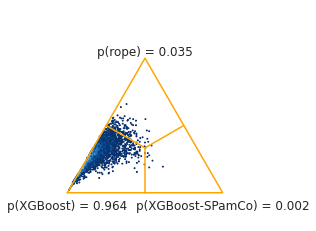

In [25]:
baycomp_xgboost, bayplot_xgboost = baycomp.two_on_multiple(
    xgboost_base_score, 
    xgboost_multi_score, 
    plot=True, 
    rope=.05, 
    names = ('XGBoost','XGBoost-SPamCo'))

In [26]:
bayplot_xgboost.savefig('XGBoost_Simplex_BaysianComp_Soft.png')

In [27]:
np.mean(xgboost_base_score, axis = 1)

array([0.91111111, 0.82037037, 0.73466667, 0.84146825, 0.79053628,
       0.82832666, 0.67714286, 0.81249896, 0.86091239, 0.82089744])

In [28]:
np.std(xgboost_base_score, axis = 1).reshape(-1,1)

array([[0.0302515 ],
       [0.02786406],
       [0.02186829],
       [0.00107902],
       [0.02344594],
       [0.00817541],
       [0.02345643],
       [0.00205189],
       [0.00965414],
       [0.00928925]])

In [29]:
np.array([np.mean(xgboost_base_score, axis = 1).reshape(-1,1),np.std(xgboost_base_score, axis = 1).reshape(-1,1)]) 

array([[[0.91111111],
        [0.82037037],
        [0.73466667],
        [0.84146825],
        [0.79053628],
        [0.82832666],
        [0.67714286],
        [0.81249896],
        [0.86091239],
        [0.82089744]],

       [[0.0302515 ],
        [0.02786406],
        [0.02186829],
        [0.00107902],
        [0.02344594],
        [0.00817541],
        [0.02345643],
        [0.00205189],
        [0.00965414],
        [0.00928925]]])

In [30]:
df = pd.DataFrame()

In [31]:
df['Dataset'] = [
    'Wisconsin Breast Cancer',
    'Digits',
    'Blood Transfusion Service Center',
    'Diabetes Health Indicators',
    'QSAR biodegradation',
    'EEG Eye State',
    'ILPD',
    'KDD Cup .1%',
    'Statlog-Landsat Satelite',
    'ISOLET'
]
df['AdaBoost Mean'] =  np.mean(adaboost_base_score, axis=1)
df['AdaBoost Std'] =  np.std(adaboost_base_score, axis=1)
df['AdaBoost+SPamCo Mean'] = np.mean(adaboost_multi_score, axis=1)
df['AdaBoost+SPamCo Std'] = np.std(adaboost_multi_score, axis=1)
df['RandomForest Mean'] = np.mean(rfc_base_score, axis=1)
df['RandomForest Std'] = np.std(rfc_base_score, axis=1)
df['RandomForest+SPamCo Mean'] = np.mean(rfc_multi_score, axis=1)
df['RandomForest+SPamCo Std'] = np.std(rfc_multi_score, axis=1)
df['XGBoost Mean'] = np.mean(xgboost_base_score, axis=1)
df['XGBoost Std'] = np.std(xgboost_base_score, axis=1)
df['XGBoost+SPamCo Mean'] = np.mean(xgboost_multi_score, axis=1)
df['XGBoost+SPamCo Std'] = np.std(xgboost_multi_score, axis=1)

In [32]:
df

,Dataset,AdaBoost Mean,AdaBoost Std,AdaBoost+SPamCo Mean,AdaBoost+SPamCo Std,RandomForest Mean,RandomForest Std,RandomForest+SPamCo Mean,RandomForest+SPamCo Std,XGBoost Mean,XGBoost Std,XGBoost+SPamCo Mean,XGBoost+SPamCo Std
0,Wisconsin Breast Cancer,0.889474,0.020501,0.629240,2.556592e-01,0.916374,0.032142,0.921637,0.022829,0.911111,0.030252,0.873099,0.042977
1,Digits,0.217593,0.040004,0.141296,4.068220e-02,0.824259,0.022260,0.771667,0.015996,0.820370,0.027864,0.665556,0.046996
2,Blood Transfusion Service Center,0.704444,0.033628,0.735111,6.364097e-02,0.742667,0.024622,0.731556,0.072900,0.734667,0.021868,0.709778,0.077874
3,Diabetes Health Indicators,0.845869,0.001458,0.842413,1.110223e-16,0.843468,0.000537,0.833169,0.003210,0.841468,0.001079,0.842380,0.000173
4,QSAR biodegradation,0.737224,0.039754,0.661199,6.830509e-02,0.755521,0.021821,0.719558,0.023201,0.790536,0.023446,0.707571,0.034356
5,EEG Eye State,0.704784,0.010190,0.555852,1.100828e-02,0.775946,0.009202,0.634424,0.013521,0.828327,0.008175,0.629150,0.025762
6,ILPD,0.658286,0.053714,0.600571,1.276590e-01,0.691429,0.032826,0.672000,0.046155,0.677143,0.023456,0.657143,0.044849
7,KDD Cup .1%,0.827284,0.003446,0.754627,1.935318e-01,0.822879,0.002715,0.748169,0.053400,0.812499,0.002052,0.718682,0.099908
8,Statlog-Landsat Satelite,0.481026,0.078120,0.382063,8.328597e-02,0.851996,0.009163,0.781700,0.010954,0.860912,0.009654,0.766563,0.019353
9,ISOLET,0.093761,0.026437,0.045171,8.157917e-03,0.849060,0.006893,0.800855,0.023599,0.820897,0.009289,0.717436,0.014002


In [33]:
df.to_csv('Classification Results on multiple datasets_Soft.csv')